In [1]:
def getSquaredDistance(point1, point2):
    return round(((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2),4)

def getDistanceFromPoints(centroids, datapoints):
    distance_from_cluster = []     # [cluster1_distances, cluster2_distances,...]
    intermediate_result = []
    for i in centroids:
        for j in datapoints:
            intermediate_result.append(getSquaredDistance(i,j))
        distance_from_cluster.append(intermediate_result)
        intermediate_result = []   # reset intermediate_result as empty list
    return distance_from_cluster


def printResult(centroids, point_to_cluster_mapping):
    for i in range(len(centroids)):
        print("Centroid",i,centroids[i])
    for i in point_to_cluster_mapping:
        print("Point: ",i,"Cluster:",point_to_cluster_mapping[i])

def kmeansclustering(centroids, datapoints):
    '''
    Driver code for K-Means clustering
    '''
    k = len(centroids)
    distance_from_cluster = getDistanceFromPoints(centroids, datapoints) # [cluster1_distances, cluster2_distances,...]
    
    
    # assign each datapoint to the nearest cluster
    
    point_to_cluster_mapping = {}   # point -> cluster
    max_valued_cluster = 0
    for i in range(len(datapoints)):
        point_to_cluster_mapping[i] = None  # initial mapping as None
        for cluster in range(len(centroids)):
            if distance_from_cluster[cluster][i] < distance_from_cluster[max_valued_cluster][i]:
                max_valued_cluster = cluster
        point_to_cluster_mapping[i] = max_valued_cluster
    
    # compute new centroids by averaging with new points
    cluster_counter = 0       # [cluster1_new_elements_added, cluster2_new_elements_added...]
    for i in range(len(centroids)):
        for j in point_to_cluster_mapping:
            if point_to_cluster_mapping[j] == i:
                centroids[i][0] += datapoints[j][0]   # x-coordinate adding
                centroids[i][1] += datapoints[j][1]   # y-coordinate adding
                cluster_counter += 1
        if cluster_counter != 0:
            centroids[i][0] = round(centroids[i][0]/cluster_counter,4)
            centroids[i][1] = round(centroids[i][1]/cluster_counter,4)
            cluster_counter = 0
        
    printResult(centroids, point_to_cluster_mapping)
    return centroids


def kmeans_iterator(centroids, datapoints):
    old_centroids = centroids
    new_centroids = centroids
    iteration = 0
    
    while iteration != 15:
        iteration += 1
        print("\nIteration ", iteration)
        old_centroids = new_centroids
        new_centroids = kmeansclustering(new_centroids, datapoints)  


centroids = [[2,10], [5,8], [1,2]]
datapoints = [[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]]


kmeans_iterator(centroids, datapoints)


Iteration  1
Centroid 0 [4.0, 20.0]
Centroid 1 [7.0, 7.6]
Centroid 2 [2.0, 4.5]
Point:  0 Cluster: 0
Point:  1 Cluster: 2
Point:  2 Cluster: 1
Point:  3 Cluster: 1
Point:  4 Cluster: 1
Point:  5 Cluster: 1
Point:  6 Cluster: 2
Point:  7 Cluster: 1

Iteration  2
Centroid 0 [4.0, 20.0]
Centroid 1 [7.4, 7.52]
Centroid 2 [2.3333, 7.1667]
Point:  0 Cluster: 2
Point:  1 Cluster: 2
Point:  2 Cluster: 1
Point:  3 Cluster: 1
Point:  4 Cluster: 1
Point:  5 Cluster: 1
Point:  6 Cluster: 2
Point:  7 Cluster: 1

Iteration  3
Centroid 0 [4.0, 20.0]
Centroid 1 [8.35, 7.13]
Centroid 2 [2.8333, 8.2917]
Point:  0 Cluster: 2
Point:  1 Cluster: 2
Point:  2 Cluster: 1
Point:  3 Cluster: 1
Point:  4 Cluster: 1
Point:  5 Cluster: 1
Point:  6 Cluster: 2
Point:  7 Cluster: 2

Iteration  4
Centroid 0 [4.0, 20.0]
Centroid 1 [9.7833, 6.71]
Centroid 2 [3.3667, 8.4583]
Point:  0 Cluster: 2
Point:  1 Cluster: 2
Point:  2 Cluster: 1
Point:  3 Cluster: 2
Point:  4 Cluster: 1
Point:  5 Cluster: 1
Point:  6 Cluster: 2


In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("student_scores.csv")


In [19]:
df

,Hours,Scores,Value
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


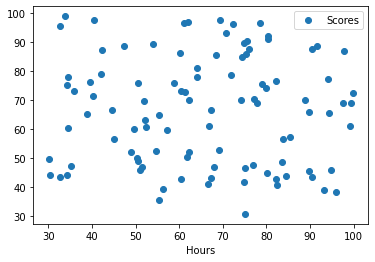

In [20]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()


In [21]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)


df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2

65.64427405779999 66.22199808840003


In [22]:
df

,Hours,Scores,Value,x,y,x*y,x^2,y^2
0,34.623660,78.024693,0,-31.020614,11.802695,-366.126843,962.278520,139.303603
1,30.286711,43.894998,0,-35.357563,-22.327001,789.428336,1250.157282,498.494954
2,35.847409,72.902198,0,-29.796865,6.680200,-199.049018,887.853181,44.625071
3,60.182599,86.308552,1,-5.461675,20.086554,-109.706223,29.829890,403.469652
4,79.032736,75.344376,1,13.388462,9.122378,122.134616,179.250915,83.217787
...,...,...,...,...,...,...,...,...
95,83.489163,48.380286,1,17.844889,-17.841712,-318.383370,318.440052,318.326697
96,42.261701,87.103851,1,-23.382573,20.881853,-488.271454,546.744732,436.051779
97,99.315009,68.775409,1,33.670735,2.553411,85.975237,1133.718379,6.519910
98,55.340018,64.931938,1,-10.304256,-1.290060,13.293110,106.177702,1.664255


In [23]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

-847.1260300398174 37483.61899734485 34186.662722571826


In [24]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5

In [25]:
correlation

-0.023664586246010887

In [26]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5


std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

19.3606867123418 18.489635670442997


In [27]:
m = correlation * (std_deviation_y / std_deviation_x)

In [28]:
m

-0.022599899708185156

In [29]:
c = df["Scores"].mean() - m * df["Hours"].mean()

In [30]:
c

67.70555209852293

In [31]:
df["y_prediction"] = m * df["Hours"] + c

In [32]:
df

,Hours,Scores,Value,x,y,x*y,x^2,y^2,y_prediction
0,34.623660,78.024693,0,-31.020614,11.802695,-366.126843,962.278520,139.303603,66.923061
1,30.286711,43.894998,0,-35.357563,-22.327001,789.428336,1250.157282,498.494954,67.021075
2,35.847409,72.902198,0,-29.796865,6.680200,-199.049018,887.853181,44.625071,66.895404
3,60.182599,86.308552,1,-5.461675,20.086554,-109.706223,29.829890,403.469652,66.345431
4,79.032736,75.344376,1,13.388462,9.122378,122.134616,179.250915,83.217787,65.919420
...,...,...,...,...,...,...,...,...,...
95,83.489163,48.380286,1,17.844889,-17.841712,-318.383370,318.440052,318.326697,65.818705
96,42.261701,87.103851,1,-23.382573,20.881853,-488.271454,546.744732,436.051779,66.750442
97,99.315009,68.775409,1,33.670735,2.553411,85.975237,1133.718379,6.519910,65.461043
98,55.340018,64.931938,1,-10.304256,-1.290060,13.293110,106.177702,1.664255,66.454873


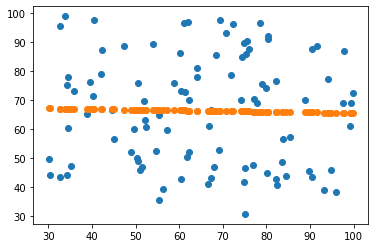

In [33]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])

In [35]:
plt.show()

In [36]:
def getMode(numbers):
    max_occur = -1
    if len(numbers) == 0:
        return None
    else:
        occurences = {}
        for i in numbers:
            if occurences.get(i) == None:
                occurences[i] = 1
            else:
                occurences[i] += 1
            if occurences[i] > max_occur:
                max_occur = occurences[i]
    
    # get max occurence number
    for i in occurences:
        if occurences[i] == max_occur:
            return i
    return None


def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg


def getMedian():
    numbers = []
    inp = 0
    while True:
        inp = int(input("Enter a number OR type 'exit'"))
        if inp == 'exit':
            break
        else:
            numbers.append(inp)
    if len(numbers) == 0:
        return None
    else:
        middle_index = len(numbers)//2
        return numbers[middle_index]


def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5


def getVariance(numbers):
    return getStandardDeviation(numbers)**2


def getNormalization(features):
    x_min = min(features)
    x_max = max(features)
    normalized_vals = []
    for i in features:
        normalized_vals.append((i - x_min)/(x_max - x_min))
    return normalized_vals
getNormalization([10,20,30,40])


def getStandardization(features):
    mean = getMean(features)
    std_deviation = getStandardDeviation(features)
    standardized_vals = []
    for i in features:
        standardized_vals.append((i - mean)/std_deviation)
    return standardized_vals
getStandardization([10,20,30,40])



# MinMax Normalization
def doMinMaxNormalization(numbers):
    result = []
    if len(numbers) == 0:
        return result
    else:
        min_value = min(numbers)
        max_value = max(numbers)
        for i in numbers:
            result.append((i - min_value)/(max_value - min_value))
        return result

features = [100000,-2,50,12,700,9000]
print(doMinMaxNormalization(features))


[1.0, 0.0, 0.0005199896002079958, 0.0001399972000559989, 0.007019859602807944, 0.09001819963600728]
